<a href="https://colab.research.google.com/github/NylaRuby/Diabetes_predictor/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# Load the dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [3]:
# Print first 5 rows
print(diabetes_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# number of rows and coulmns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# Data insights
print(diabetes_dataset.describe())
print(diabetes_dataset['Outcome'].value_counts())
print(diabetes_dataset.groupby('Outcome').mean())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
# getting statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Features and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

0--> Non-Diabetic
1--> Diabetic


In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Data Standardization

In [8]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data



In [9]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [10]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [11]:
# Train SVM model
classifier = svm.SVC(kernel='linear', probability=True)  # add probability=True for ROC
classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

Train Test Split

In [12]:
# Predict on training and test sets
X_train_prediction = classifier.predict(X_train)
X_test_prediction = classifier.predict(X_test)

Model Evaluation

Accuracy Score

In [14]:
# Accuracy
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Training Accuracy:', training_data_accuracy)
print('Test Accuracy:', test_data_accuracy)

Training Accuracy: 0.7866449511400652
Test Accuracy: 0.7727272727272727


In [15]:
# ✅ Precision, Recall, F1-Score
print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))



Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



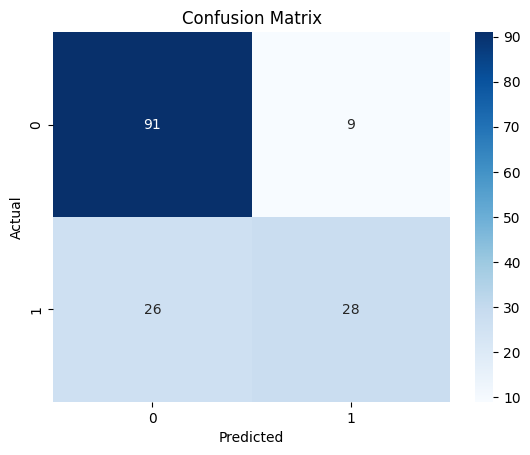

In [16]:
# ✅ Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


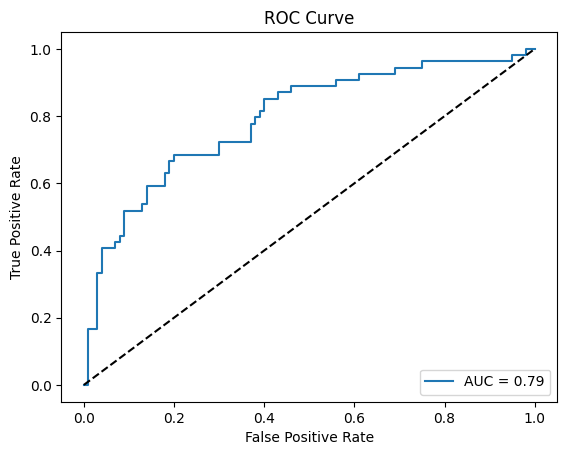

In [20]:
# ✅ ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

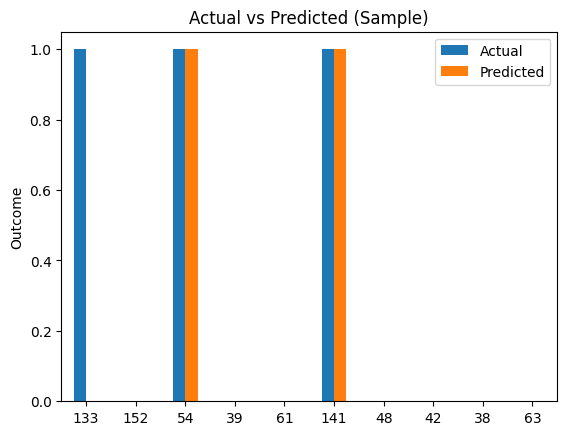

In [30]:
# ✅ Actual vs Predicted bar chart (sample)
df_results = pd.DataFrame({
    'Actual': Y_test.values,
    'Predicted': X_test_prediction
})
df_results.sample(10).plot(kind='bar')
plt.title("Actual vs Predicted (Sample)")
plt.ylabel("Outcome")
plt.xticks(rotation=0)
plt.show()

Making a Predictive System

In [29]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
std_data = scaler.transform(input_data_as_numpy_array)
prediction = classifier.predict(std_data)

print("Prediction for new input:", prediction)
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Prediction for new input: [1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
